In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# PCA and Dimensionality Reduction

the desired goal is to reduce the dimensions of a dd-dimensional dataset by projecting it onto a k-dimensional subspace (where k < d) in order to increase the computational efficiency while retaining most of the information. An important question is “what is the size of k that represents the data 'well'?”

Later, we will compute eigenvectors (the principal components) of a dataset and collect them in a projection matrix. Each of those eigenvectors is associated with an eigenvalue which can be interpreted as the 'length' or 'magnitude' of the corresponding eigenvector. If some eigenvalues have a significantly larger magnitude than others that the reduction of the dataset via PCA onto a smaller dimensional subspace by dropping the 'less informative' eigenpairs is reasonable.

# A Summary of the PCA Approach
- Standardize the data.
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
- Sort eigenvalues in descending order and choose the kk eigenvectors that correspond to the k largest eigenvalues where kk is the number of dimensions of the new feature subspace (k <= d).
- Construct the projection matrix W from the selected k eigenvectors.
- Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.

We will use HR dataset, same like standardization and normalization

In [2]:
df = pd.read_csv('/home/huseinzol05/Desktop/Introduction-DataScience-Python/pandas/data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


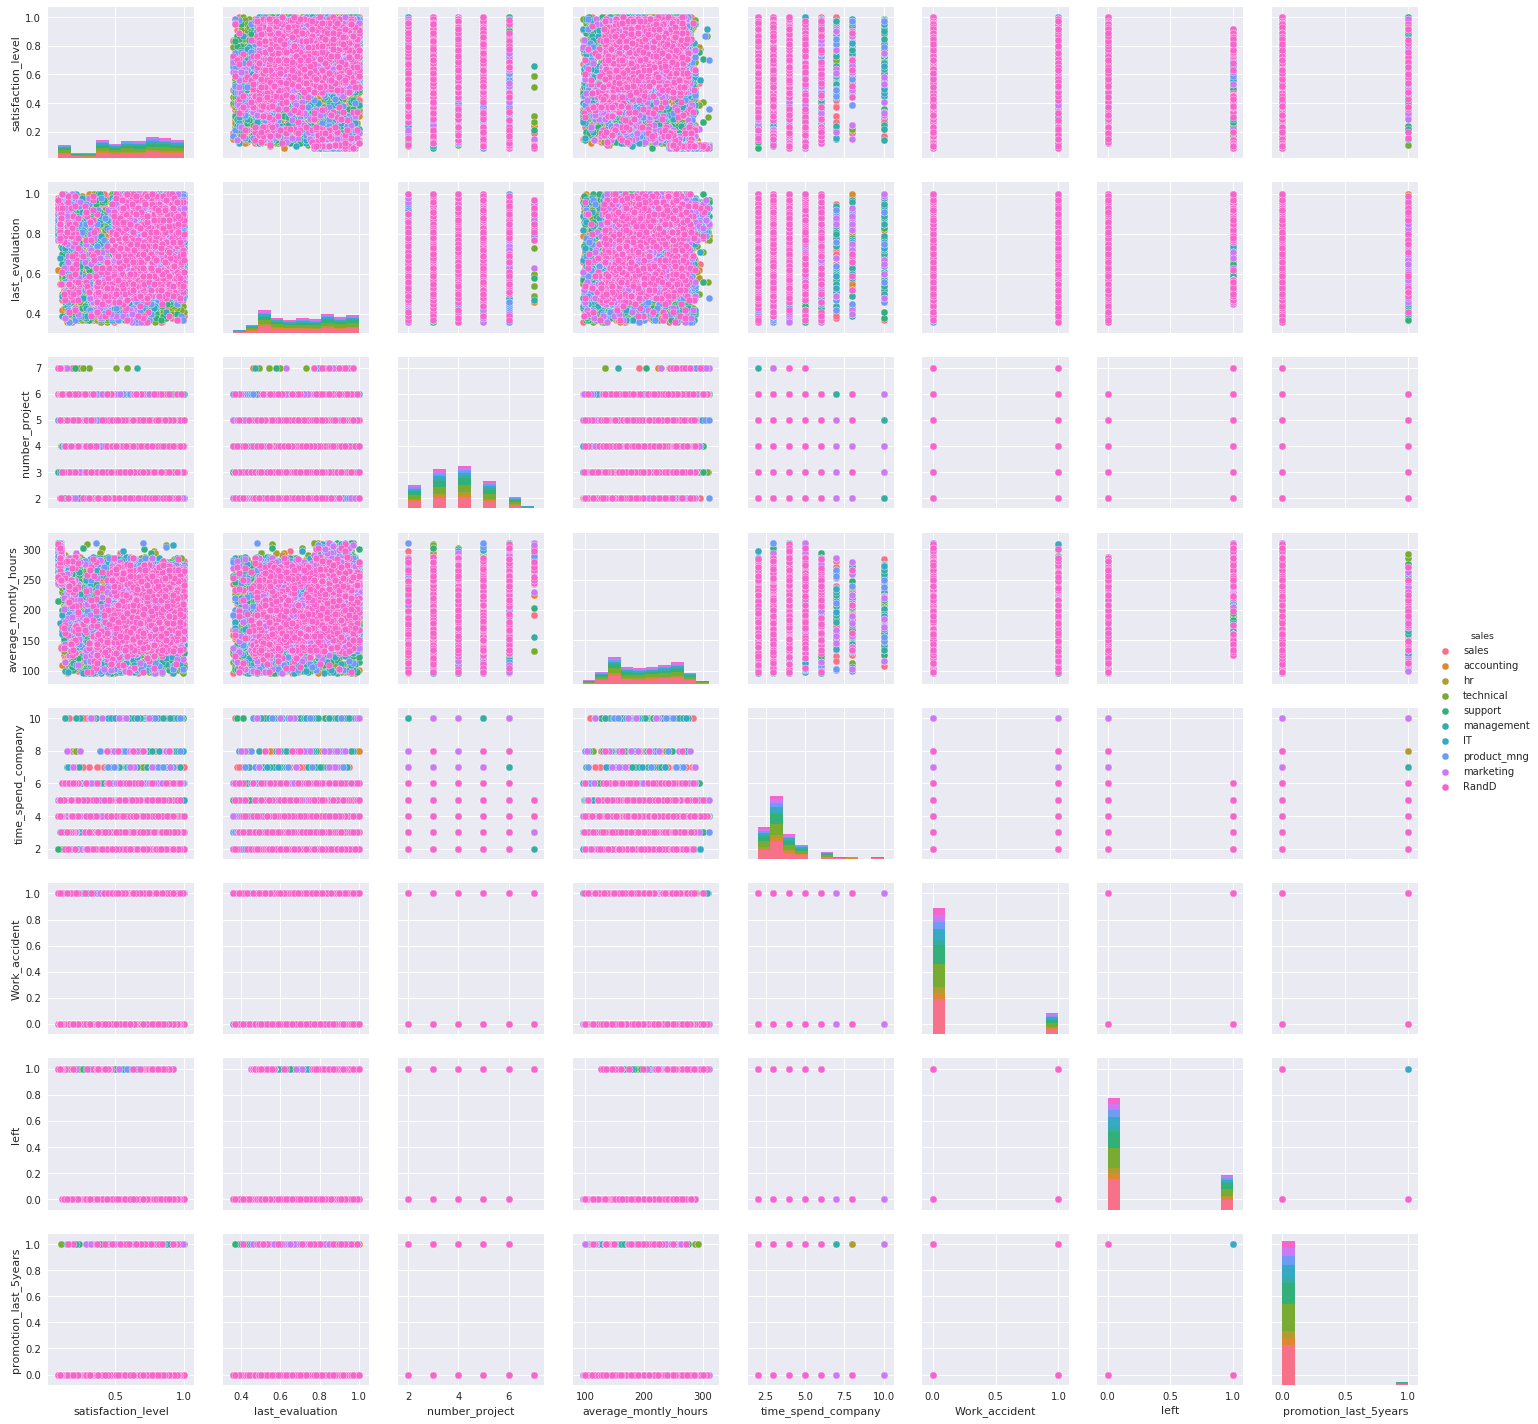

In [3]:
fig = plt.figure(figsize = (20, 20))
print(np.unique(df['sales']))
sns.pairplot(df.iloc[:, :-1], hue = "sales")
plt.show()

RandD is taking over the world!

In [4]:
from sklearn.preprocessing import LabelEncoder

# change string into integer representation
df['sales'] = LabelEncoder().fit_transform(df['sales'])
df['salary'] = LabelEncoder().fit_transform(df['salary'])

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


1- Standardize the data

In [5]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(df)

2- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix

![alt text](http://education.howthemarketworks.com/wp-content/uploads/2013/09/Covariance.jpg)

But we change the Y with X, and X with X transpose, to find the covariance with the population itself

In [7]:
mean_vec = np.mean(X_std, axis = 0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0] - 1)
print(cov_mat.shape)
print('Covariance matrix \n%s' % cov_mat)

(10, 10)
Covariance matrix 
[[  1.00006668e+00   1.05028216e-01  -1.42979119e-01  -2.00494499e-02
   -1.00872798e-01   5.87011547e-02  -3.88400879e-01   2.56068929e-02
    3.15350740e-03   1.17549436e-02]
 [  1.05028216e-01   1.00006668e+00   3.49355880e-01   3.39764452e-01
    1.31599496e-01  -7.10476220e-03   6.56755831e-03  -8.68434690e-03
    7.77263822e-03   1.39658459e-02]
 [ -1.42979119e-01   3.49355880e-01   1.00006668e+00   4.17238452e-01
    1.96799012e-01  -4.74086380e-03   2.37887711e-02  -6.06436224e-03
    9.26889467e-03   9.67240198e-03]
 [ -2.00494499e-02   3.39764452e-01   4.17238452e-01   1.00006668e+00
    1.27763428e-01  -1.01435645e-02   7.12919319e-02  -3.54465062e-03
    3.91339390e-03   7.08243258e-03]
 [ -1.00872798e-01   1.31599496e-01   1.96799012e-01   1.27763428e-01
    1.00006668e+00   2.12055948e-03   1.44831831e-01   6.74374215e-02
   -1.80107645e-02  -3.08646144e-03]
 [  5.87011547e-02  -7.10476220e-03  -4.74086380e-03  -1.01435645e-02
    2.12055948e-0

3- Calculate eigen components

In [10]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('eigen val shape:', eig_vals.shape)
print('eigen vector shape:', eig_vecs.shape)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

eigen val shape: (10,)
eigen vector shape: (10, 10)
Eigenvectors 
[[ 0.18927698  0.6075015  -0.51045612 -0.29083902  0.237478    0.32585746
   0.13717974  0.23912732  0.09297331  0.05234774]
 [-0.46373394  0.31167319  0.27158652  0.54737318  0.52385414  0.06654252
   0.14513956  0.09262207  0.07232629  0.02659921]
 [-0.55699786  0.12224614 -0.58713276  0.24207953 -0.47420317 -0.19081015
   0.01299494 -0.0953533  -0.00841021 -0.02954442]
 [-0.52553094  0.17809611  0.30487702 -0.72158597  0.02564597 -0.25437255
   0.1016044  -0.01824323  0.04909061 -0.00578161]
 [-0.33346165 -0.11598289  0.11205772 -0.0929311  -0.16381371  0.79368946
  -0.4243698   0.05917149 -0.11513605 -0.02308652]
 [ 0.06444448  0.28059052 -0.07102171 -0.02965169  0.25284405 -0.06586044
  -0.33720433 -0.70630671 -0.39316531 -0.27526345]
 [-0.2165416  -0.61636381 -0.45561193 -0.16252783  0.58038944 -0.01028772
   0.0222466   0.00637226 -0.04089959  0.00646749]
 [ 0.00918556  0.11510472 -0.03617664  0.02303158  0.105206

In [11]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.86135908979
1.46502995206
1.07411767695
1.0013204543
0.99338579082
0.949295417579
0.845368834942
0.70757757835
0.626513079487
0.476698881281


In [12]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

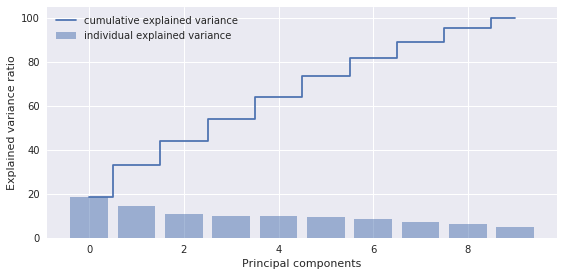

In [13]:
plt.figure(figsize=(8, 4))
plt.bar(range(eig_vals.shape[0]), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(eig_vals.shape[0]), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The plot above clearly shows that most of the variance (19.90% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (12%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 32% of the information.

4- Calculate projection matrix

Here, we are reducing the 10-dimensional feature space to a 2-dimensional feature subspace, by choosing the 'top 2' eigenvectors with the highest eigenvalues to construct our d x k-dimensional eigenvector matrix W

In [15]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(eig_vals.shape[0],1),
                      eig_pairs[1][1].reshape(eig_vals.shape[0],1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.18927698  0.6075015 ]
 [-0.46373394  0.31167319]
 [-0.55699786  0.12224614]
 [-0.52553094  0.17809611]
 [-0.33346165 -0.11598289]
 [ 0.06444448  0.28059052]
 [-0.2165416  -0.61636381]
 [ 0.00918556  0.11510472]
 [-0.01301963 -0.02945876]
 [-0.01420444  0.03057895]]


In [16]:
Y = X_std.dot(matrix_w)

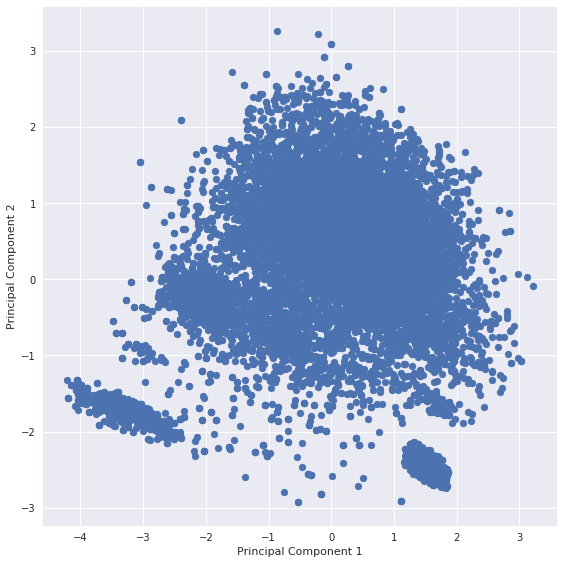

In [17]:
plt.figure(figsize=(8, 8))
plt.scatter(Y[:, 0], Y[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

If you are lazy to calculate covariance, eigen components and projection matrix, just use sklearn library

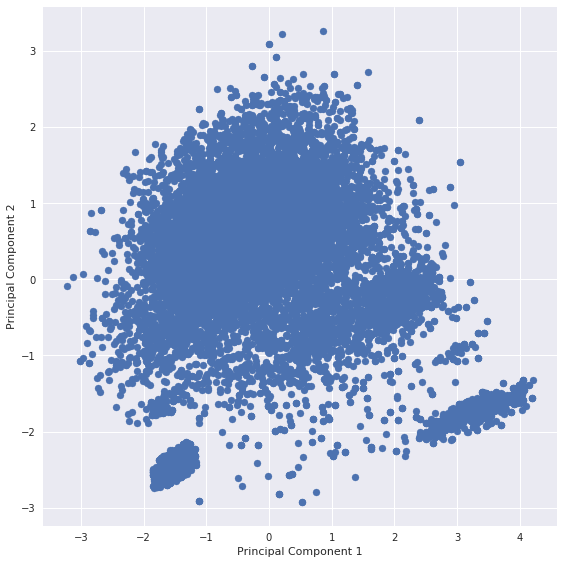

In [21]:
from sklearn.decomposition import PCA
plt.figure(figsize=(8, 8))
Y_sklearn = PCA(n_components=2).fit_transform(X_std)
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

The output from sklearn is mirrored of our manual calculation